<img src="../../../imgs/CampQMIND_banner.png">

# Decision Trees

Decision trees are strong and easily interpretable models. They can also be used as building blocks for bigger, and stronger models such as gradient boosted trees and random forests.

Author: [Umur Gokalp](https://www.github.com/uGokalp)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Decision Trees</a></span></li><li><span><a href="#Videos-" data-toc-modified-id="Videos--2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Videos <a name="videos"></a></a></span><ul class="toc-item"><li><span><a href="#Short-Version" data-toc-modified-id="Short-Version-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Short Version</a></span></li><li><span><a href="#Long-Version" data-toc-modified-id="Long-Version-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Long Version</a></span></li></ul></li><li><span><a href="#Pros-and-Cons-" data-toc-modified-id="Pros-and-Cons--3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pros and Cons <a name="proscons"></a></a></span><ul class="toc-item"><li><span><a href="#Pros" data-toc-modified-id="Pros-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Pros</a></span></li><li><span><a href="#Cons" data-toc-modified-id="Cons-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cons</a></span></li></ul></li><li><span><a href="#Decision-Trees-for-Regression-" data-toc-modified-id="Decision-Trees-for-Regression--4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Decision Trees for Regression <a name="regression"></a></a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Reduction-in-Variance-for-Regression-Problems" data-toc-modified-id="Reduction-in-Variance-for-Regression-Problems-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Reduction in Variance for Regression Problems</a></span></li></ul></li><li><span><a href="#The-Algorithm" data-toc-modified-id="The-Algorithm-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>The Algorithm</a></span></li></ul></li><li><span><a href="#Decision-Trees-for-Classification-" data-toc-modified-id="Decision-Trees-for-Classification--5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Decision Trees for Classification <a name="classification"></a></a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Reduction-in-Gini-index-for-Classification-Problems" data-toc-modified-id="Reduction-in-Gini-index-for-Classification-Problems-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Reduction in Gini index for Classification Problems</a></span></li></ul></li><li><span><a href="#The-Algorithm" data-toc-modified-id="The-Algorithm-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>The Algorithm</a></span></li></ul></li><li><span><a href="#Some-useful-parameters-to-explore-" data-toc-modified-id="Some-useful-parameters-to-explore--6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Some useful parameters to explore <a name="params"></a></a></span></li><li><span><a href="#Pruning-" data-toc-modified-id="Pruning--7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Pruning <a name="pruning"></a></a></span><ul class="toc-item"><li><span><a href="#The-Reduced-Error-Pruning-Algorithm-" data-toc-modified-id="The-Reduced-Error-Pruning-Algorithm--7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>The Reduced Error Pruning Algorithm <a name="reducederror"></a></a></span></li></ul></li><li><span><a href="#Extra-resources-" data-toc-modified-id="Extra-resources--8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Extra resources <a name="extra"></a></a></span></li></ul></div>

# Videos <a name="videos"></a>
## Short Version

In [1]:
from IPython.display import IFrame
IFrame('https://www.youtube.com/embed/7VeUPuFGJHk',560,315)

## Long Version

In [2]:
IFrame('https://www.youtube.com/embed/H4XlBTPv5rQ',560,315)

# Pros and Cons <a name="proscons"></a>

## Pros
- Can be modeled for both classification and regression tasks.
- Less encoding is needed.
    - Example: A variable is only evaluated against itself which means you don't need to standardize.
- Easily interpretable.

## Cons
- Tends to overfit.
- Does not play well with inbalanced datasets.
- Globally optimal tree is an NP-complete problem. Only locally optimal trees are built using greedy heuristics. (see [Resursive Binary Split](https://en.wikipedia.org/wiki/Binary_splitting))



# Decision Trees for Regression <a name="regression"></a>

In [3]:
from sklearn.tree import plot_tree,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
tips = sns.load_dataset("tips")

In [4]:
tips.sex = tips.sex.map({"Female":0, "Male": 1})
tips.smoker = tips.smoker.map({"No":0, "Yes":1})
tips.day = tips.day.map({"Sun":0,"Sat":1, "Thur":2, "Fri":3})
tips.time = tips.time.map({"Lunch":0, "Dinner":1})

In [5]:
X_train, X_test, y_train, y_test = train_test_split(tips.drop("tip",axis=1),tips.tip)
features = tips.drop("tip",axis=1).columns.tolist()

In [6]:
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2)

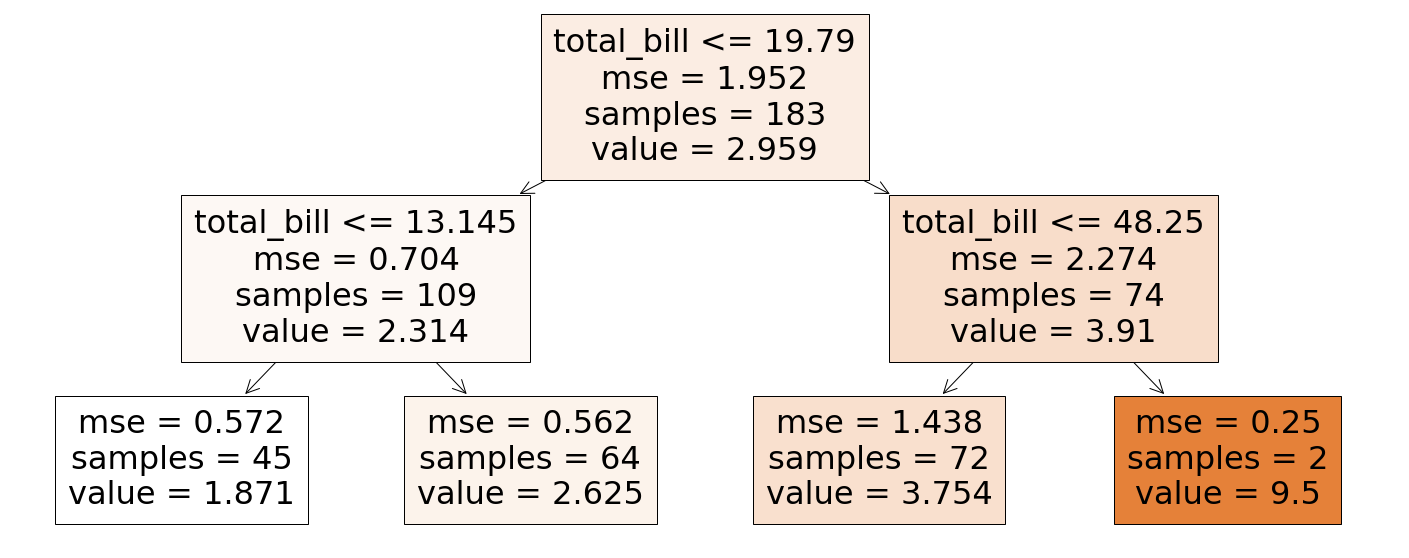

In [7]:
plt.figure(figsize=(25,10))
a = plot_tree(tree,feature_names=features,class_names='tip', filled=True )

### Reduction in Variance for Regression Problems

We denote variance as $$\sigma^2 = \frac{\sum(x-\bar{x})^2}{n}$$

When building the decision tree, the algorithm will split on nodes that result in lower __Mean Squared Error__. This is demonstrated by the decision tree above.


## The Algorithm


    1. Compute the squared error for the dataset
    2. For every feature:
        1. Perform a split on each value
           1. for each split calculate the squared error for all values.
           2. Take the weighted average of two splits and store it.
    3. Pick the lowest squared error attribute and split.
    4. Grow the tree until you get to a terminal state.

# Decision Trees for Classification <a name="classification"></a>

In [8]:
from sklearn.tree import plot_tree,DecisionTreeClassifier
from sklearn.datasets import load_iris

In [9]:
X,y = load_iris(return_X_y=True)
features = load_iris().feature_names
target = ['setosa', 'versicolor', 'virginica']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [10]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

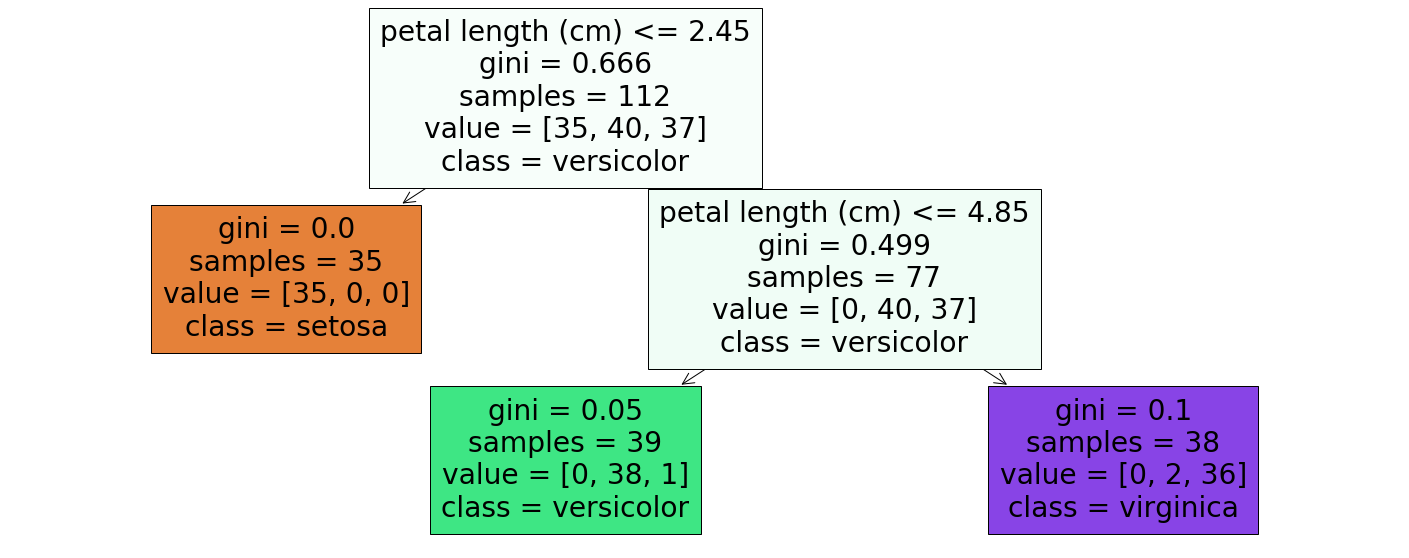

In [11]:
plt.figure(figsize=(25,10))
p = plot_tree(clf,feature_names=features,class_names=target, filled=True)

### Reduction in Gini index for Classification Problems

Note: Gini index is also known as Gini impurity.

$$\text{Gini} = 1 - \sum_{i=1}^{C}(p_i)^2$$

A node is said to be pure if it only contains samples from a single class.

We want to split on the smallest Gini index.
<p>If it is pure, the Gini index will return 0 like the split on the far right and the far left.</p>

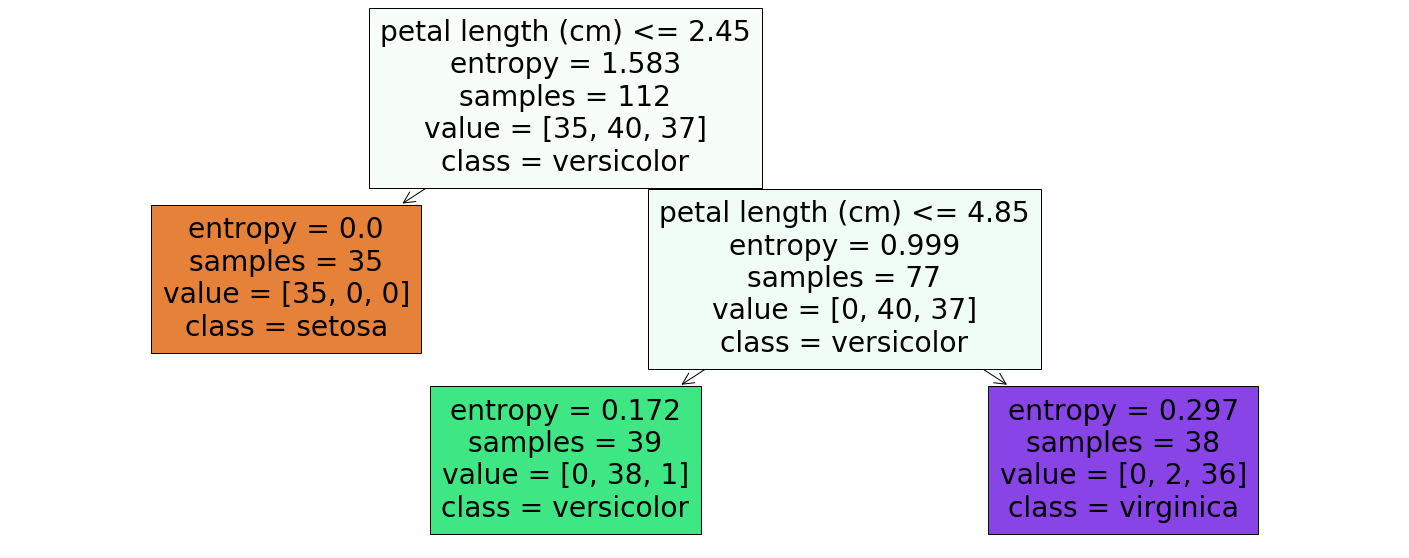

In [12]:
clf = DecisionTreeClassifier(max_depth=2,criterion='entropy')
clf.fit(X_train,y_train)
plt.figure(figsize=(25,10))
p = plot_tree(clf,feature_names=features,class_names=target, filled=True)

## The Algorithm


    1. Compute the gini index for  the dataset
    2. For every feature:
        1. Perform a split on each value
           1. for each split calculate gini index for all values (either categorical or binned numeric)
           2. Take the weighted average of two splits and store it.
    3. Pick the lowest Gini index (highest info gain) attribute and split.
    4. Grow the tree until you get to a terminal state.

# Some useful parameters to explore <a name="params"></a>

max_depth: The deeper your tree is, the more likely it will overfit.
- Values such as 4, 6, 8, 12 could be a good starting point

min_samples_split: Number of samples you need to split a node.

min_samples_leaf: Similar to min_samples_split but this refers to the resulting node after a split.

class_weight: Useful when the distribution of the classes are unbalanced.

A full list of parameters is available [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

# Pruning <a name="pruning"></a>

As I mentioned earlier, decision trees are prone to overfitting.

A way we can tackle this issue is by pruning, which refers to replacing a branch by a leaf node. 

One should note that while pruning/regularizing, the  variance of the tree is reduced while bias is increased. (see Bias and Variance Tradeoff)

## The Reduced Error Pruning Algorithm <a name="reducederror"></a>


The decision tree must be grown to the maximum extend. Compare the decision at the deepest branch with a leaf node on the validation set.

If the leaf node performs better, swap the branch with a leaf node.

In [13]:
IFrame('https://www.youtube.com/embed/PPp_YetzivA',560,315)

# Extra resources <a name="extra"></a>

1. Two-part [youtube series](https://www.youtube.com/watch?v=jVh5NA9ERDA&list=PLqnslRFeH2Upcrywf-u2etjdxxkL8nl7E&index=9&t=0s) on building decision tree with NumPy.
2. A more in-depth mutli-part [youtube series](https://www.youtube.com/playlist?list=PLPOTBrypY74xS3WD0G_uzqPjCQfU6IRK-) on building decision tree with NumPy.
3. Decision tree practice notebook [Kaggle Kernel](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees) | [Solution](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees-solution)